# Data Exploration

# Load the dataset and show the first 10 rows.

# Check for missing values.

# Display info() and describe().

# Which columns are numeric? Which are categorical

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [24]:
tips = sns.load_dataset('tips')
tips.head(10)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [25]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [26]:
tips.info()
tips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [27]:
print("Numeric columns:")
print(tips.select_dtypes(include=['float', 'int']).columns)

print("\nCategorical columns:")
print(tips.select_dtypes(include=['object', 'category']).columns)

Numeric columns:
Index(['total_bill', 'tip', 'size'], dtype='object')

Categorical columns:
Index(['sex', 'smoker', 'day', 'time'], dtype='object')


# Univariate Analysis

# Plot a histogram of total_bill.

# Plot a histogram of tip, with a KDE curve.

# Make a countplot of day (which day of the week has the most data?)

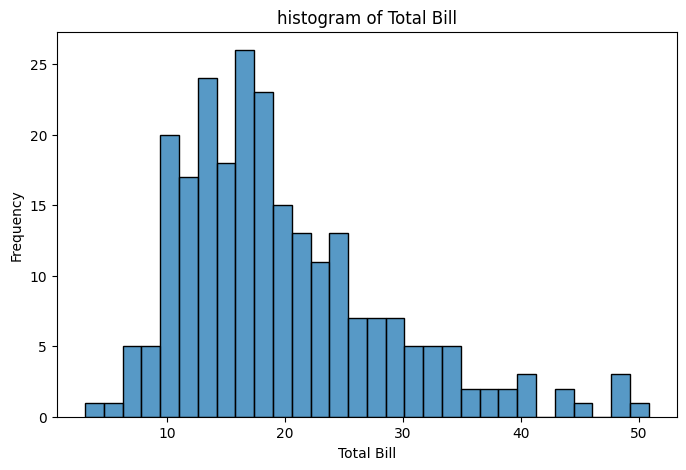

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(tips['total_bill'], bins=30)
plt.title('histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()


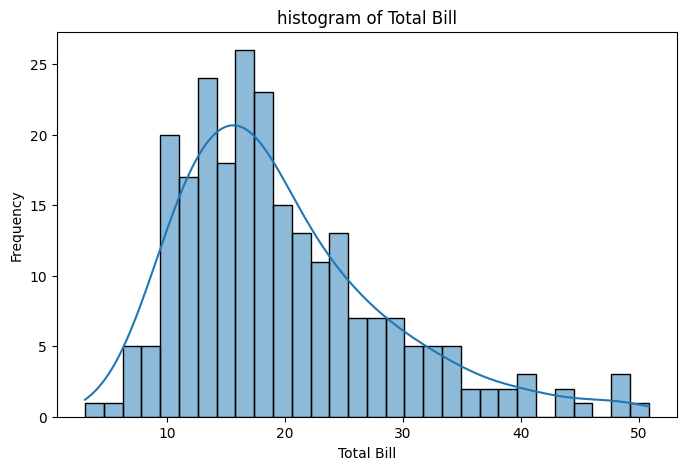

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(tips['total_bill'], bins=30, kde=True)
plt.title('histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()


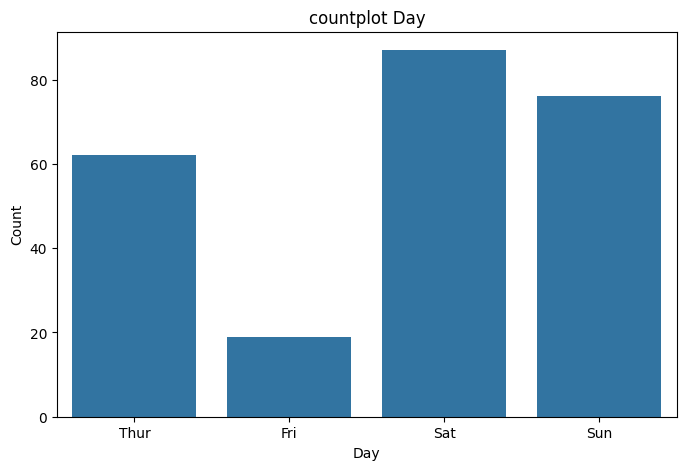

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data=tips, x='day')
plt.title('countplot Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

# Scatter plot: total_bill vs tip.

# Add hue='sex' to the scatter plot.

# Create a boxplot of total_bill by time (Lunch vs Dinner).

# Make a violinplot of tip by smoker (Smoker vs Non-Smoker).

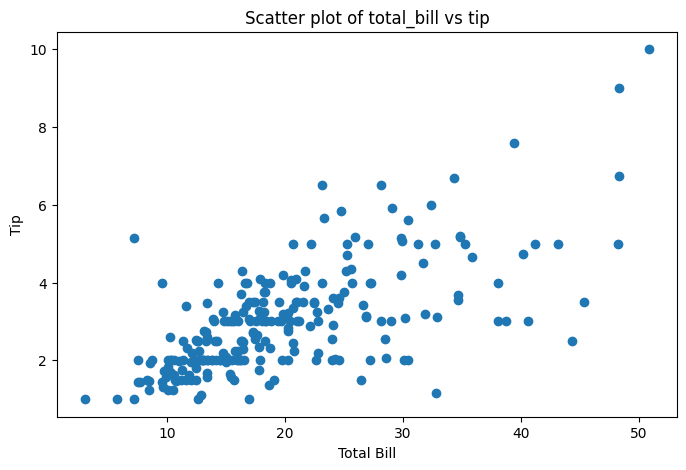

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(data=tips, x='total_bill', y='tip')
plt.title('Scatter plot of total_bill vs tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

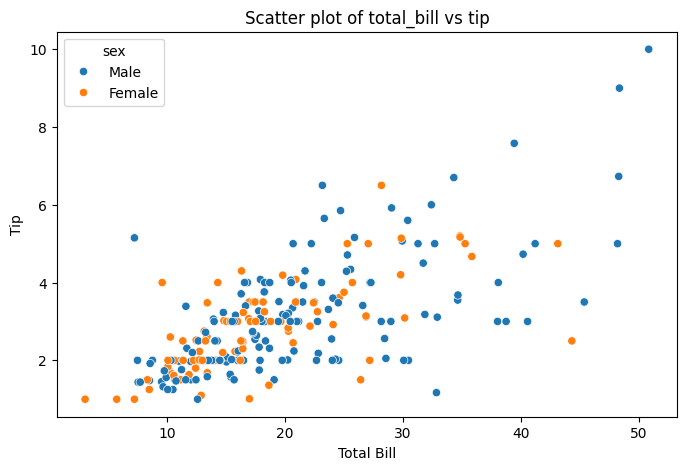

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.title('Scatter plot of total_bill vs tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

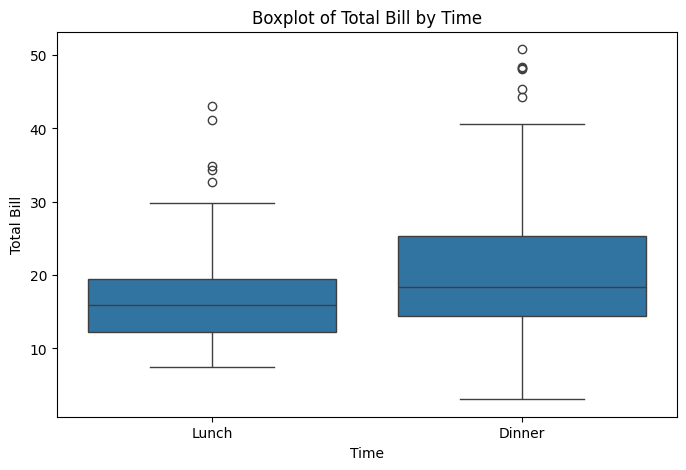

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=tips, x='time', y='total_bill')
plt.title('Boxplot of Total Bill by Time')
plt.xlabel('Time')
plt.ylabel('Total Bill')
plt.show()

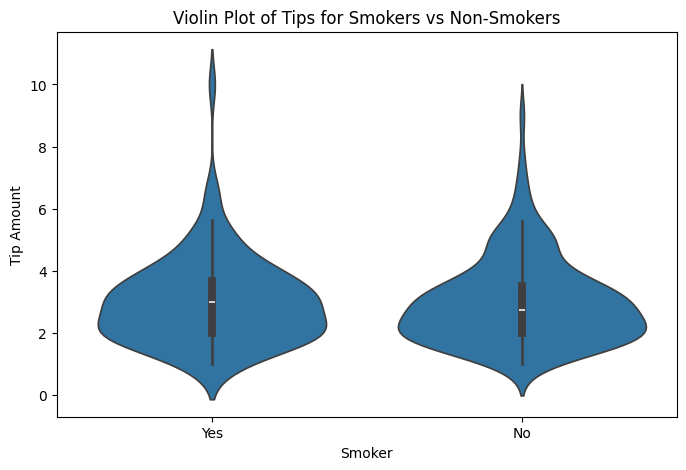

In [34]:
plt.figure(figsize=(8,5))
sns.violinplot(data=tips, x='smoker', y='tip')
plt.title('Violin Plot of Tips for Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Tip Amount')
plt.show()


# Multivariate Analysis

# Scatter plot of total_bill vs tip, with:

# hue='sex'

# style='time'

# size='size' (meal group size)

# Use a pairplot on the whole dataset with hue='smoker'.

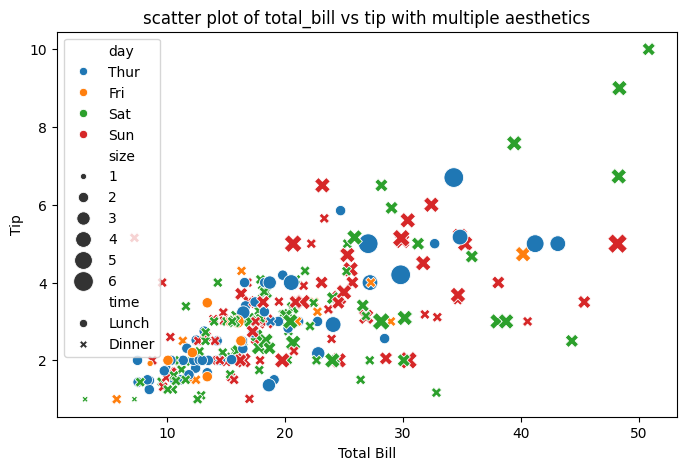

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time', size='size', sizes=(20, 200))
plt.title('scatter plot of total_bill vs tip with multiple aesthetics')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

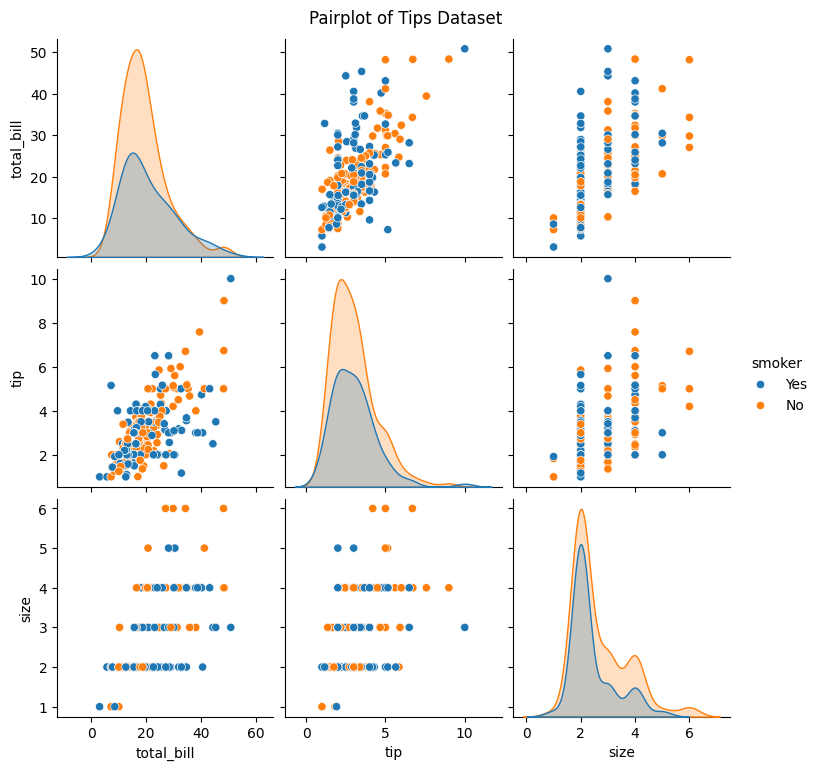

In [36]:
plt.Figure(figsize=(8,5))
sns.pairplot(tips, hue='smoker', diag_kind='kde')
plt.suptitle('Pairplot of Tips Dataset', y=1.02)
plt.show()

# Categorical + Numeric

# Barplot: average tip for each day (x='day', y='tip').

# Add hue='time' (Lunch vs Dinner).

# Try boxplot: tip percentage


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12696\1235660710.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips, x='day', y='tip', hue='time', ci=None)


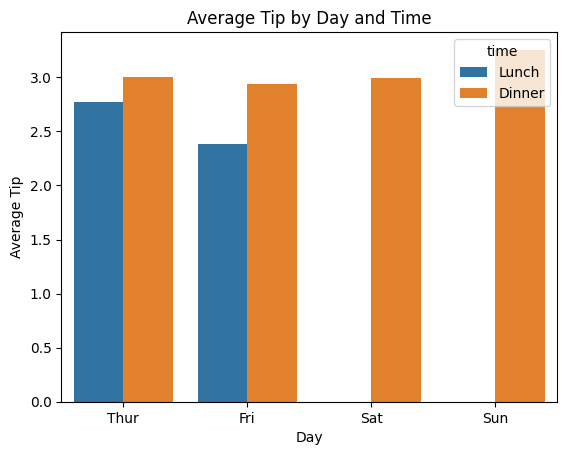

In [37]:
plt.Figure(figsize=(8,6))
sns.barplot(data=tips, x='day', y='tip', hue='time', ci=None)
plt.title('Average Tip by Day and Time')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()

In [38]:
tips['tip_pct'] = (tips['tip'] / tips['total_bill']) * 100


# by day

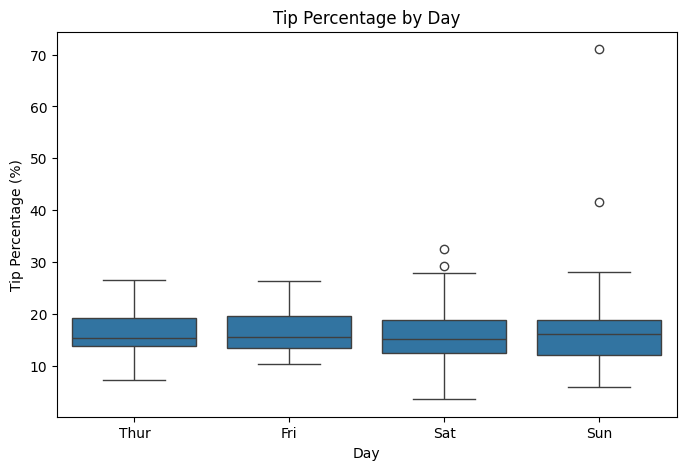

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(data=tips, x='day', y='tip_pct')
plt.title('Tip Percentage by Day')
plt.xlabel('Day')
plt.ylabel('Tip Percentage (%)')
plt.show()


# By Smoker Status

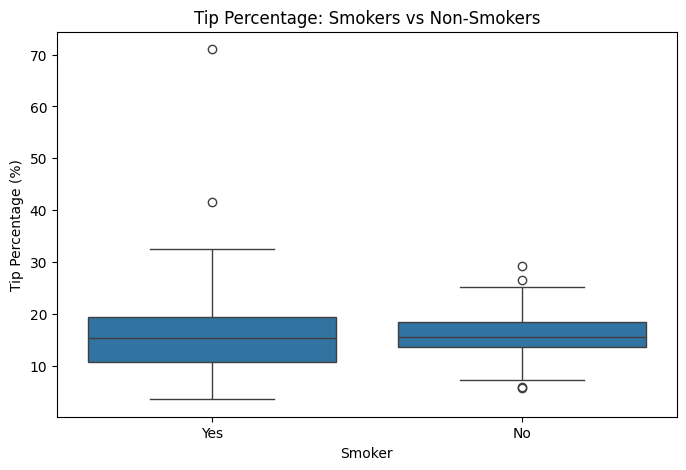

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(data=tips, x='smoker', y='tip_pct')
plt.title('Tip Percentage: Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Tip Percentage (%)')
plt.show()


# By Time 

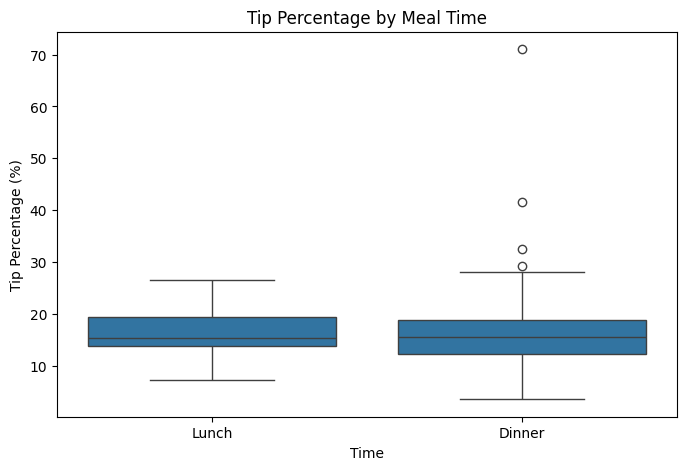

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(data=tips, x='time', y='tip_pct')
plt.title('Tip Percentage by Meal Time')
plt.xlabel('Time')
plt.ylabel('Tip Percentage (%)')
plt.show()


# Correlation & Heatmap

# Compute correlation matrix of numeric columns.

# Visualize it with a heatmap.

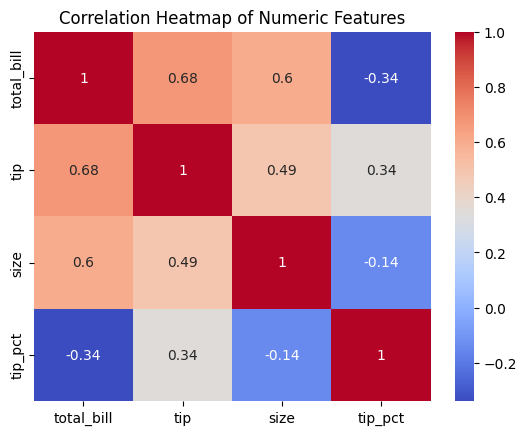

In [42]:
plt.Figure(figsize=(10,6))
corr = tips.select_dtypes(include=['float', 'int']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# Customization Challenge

# Choose any three plots above and do ALL of the following:

# Change the color palette

# Add titles & axis labels

# Use sns.set_style() and sns.set_context()

# Rotate labels where necessary

# GLOBAL STYLE SETTINGS

In [43]:
sns.set_style("whitegrid")       # clean background grid
sns.set_context("talk")         # larger fonts


# Histogram — total_bill (custom palette)

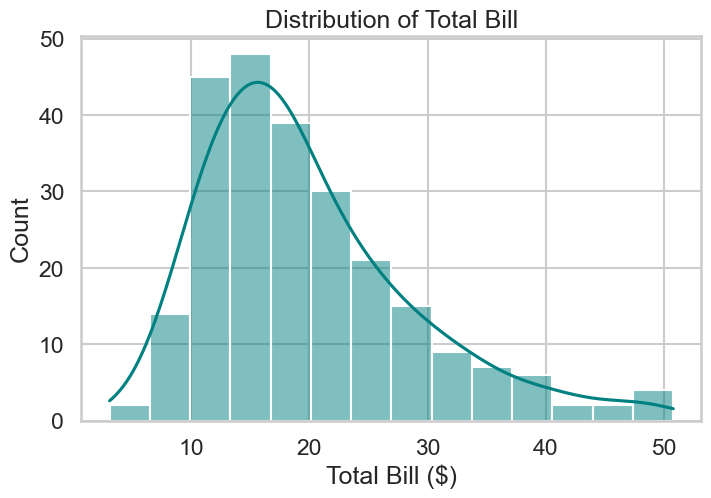

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=tips, 
    x='total_bill', 
    kde=True, 
    color='teal'        # custom color
)
plt.title("Distribution of Total Bill", fontsize=18)
plt.xlabel("Total Bill ($)")
plt.ylabel("Count")
plt.show()


# Boxplot — Tip Percentage by Day (with rotated labels)

In [45]:
tips['tip_pct'] = (tips['tip'] / tips['total_bill']) * 100


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12696\1679003862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


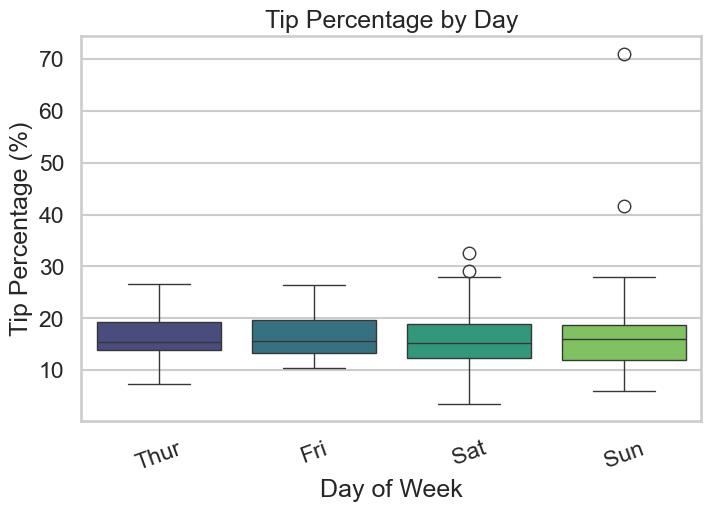

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=tips, 
    x='day', 
    y='tip_pct', 
    palette='viridis'   # custom palette
)
plt.title("Tip Percentage by Day", fontsize=18)
plt.xlabel("Day of Week")
plt.ylabel("Tip Percentage (%)")
plt.xticks(rotation=20)   # rotates labels slightly
plt.show()


# Scatter Plot — total_bill vs tip (fancy colors + labels)

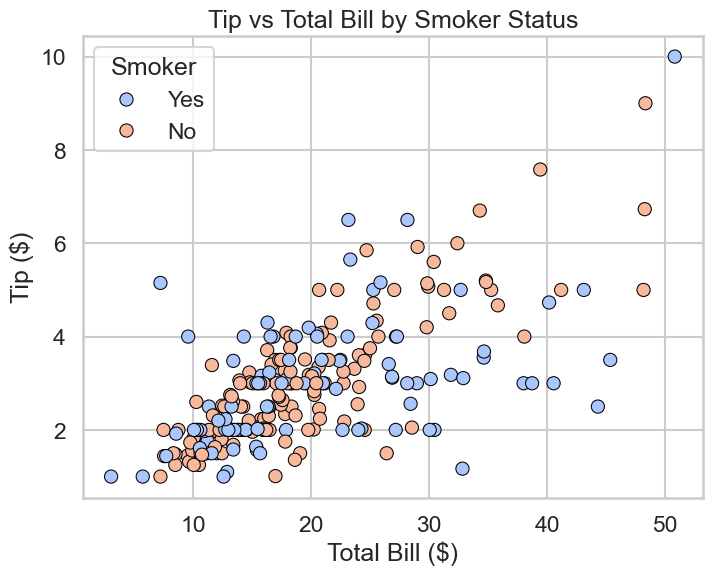

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tips, 
    x='total_bill', 
    y='tip',
    hue='smoker',             # adds color groups
    palette='coolwarm',       # custom palette
    s=90,                     # bigger points
    edgecolor='black'
)
plt.title("Tip vs Total Bill by Smoker Status", fontsize=18)
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend(title='Smoker')
plt.show()
